<a href="https://colab.research.google.com/github/billliao628/House-Prices-Advanced-Regression-Techniques/blob/master/%E2%80%9CProject_Yao_Ting_Liao%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition-House Prices: Advanced RegressionTechniques


# Exploratory Data Analysis

In [0]:
# load the necessary libraries

# pandas
import pandas as pd
from pandas import Series,DataFrame

# visualization
import seaborn as sns

# to download files from Colab to our computer
from google.colab import files

In [0]:
# get train & test csv files as a DataFrame
train_df = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/train.csv")
test_df    = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/test.csv")

In [0]:
# preview the data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#check the shape of train data
train_df.shape


(1460, 81)

In [0]:
#check the shape of test data
test_df.shape

(1459, 80)

In [0]:
#we see that train data has one more column, so check which column
print(set(train_df.columns)-set(test_df.columns))


{'SalePrice'}


This is imoportant information to know since we need to remember to drop SalePrice later own before ridge regression 

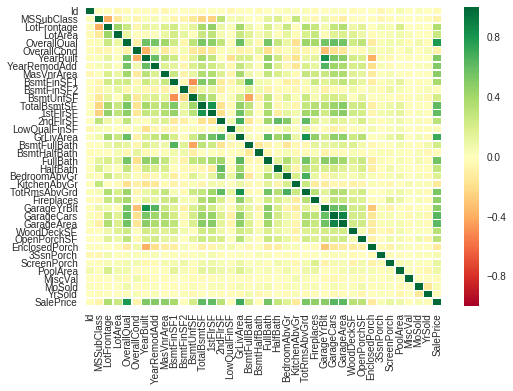

In [0]:
# create heatmap to see the relationship(correlation) between variables in train data set

sns.heatmap(train_df.corr(), vmax=1, cmap='RdYlGn', linewidths=0.5)

From the heatmap, we see that some variables such as OverallQual, TotalBsmtSF, 1stFlrSF have the most correlation with SalePrice




In [0]:
# Do correlation to see if there is difference 
train_df.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

This shows us more clearly that variables such as OverallQual, GrLivArea correlates more with SalePrice 

In [0]:
# Now we let's see # of observation, datatypes, and if there is missing value
print("train data variables")
train_df.info()
print("  ")
print("test data variables")
test_df.info()

train data variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exteri

We see that there are 3 data types and many missing values in some of the variables

# Data Wrangling or Data Munging

## Dealing with the missing values first (only for the variables that has a lot of missing value)

In [0]:
# checking missing variables in train dataset
train_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

We assume around or over 50% of data missing has alot of value missing

From training data, we see that Alley, FirePlaceQu, PoolQC, Fence, MiscFeature, has alot of values missing 

In [0]:
# checking missing variables in the test dataset
test_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

We assume around or over 50% of data missing has alot of value missing

From testing data, we see that Alley, FirePlaceQu, PoolQC, Fence, MiscFeature, has alot of values missing 

## Drop the variables that has alot of values missing

In [0]:
#Drop variables that has a lot of values missing in train dataset
train_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1, inplace = True) 


In [0]:
#Drop variables that has a lot of values missing in testing dataset
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1, inplace = True) 

## For now, We will only use int and float data type for submission
## We will test it out first and see the score, if the score isn't good, we might want to also consider object type variables by adding dummy variables.

##For now, we exclude object datatype in both training and testing data set

In [0]:
# we exclude objective data type for train data set
train_df=train_df.select_dtypes(exclude=['object'])



In [0]:
# check to see if train data has no objective data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [0]:
# we exclude objective data type for test data set
test_df=test_df.select_dtypes(exclude=['object'])



In [0]:
# check to see if test data has no objective data type
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1457 non-null float64
BsmtHalfBath     1457 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

## Deal with missing values in float and int data type(columns with lesser missing variable) by filling the missing value with mean


In [0]:
#fill in missing values with mean in data set
mean = train_df.mean()
train_df= train_df.fillna(mean)

In [0]:
# check to see if there is still missing value in train data
train_df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [0]:
#fill in missing values with mean in test set
test_mean = test_df.mean()
test_df=test_df.fillna(test_mean)

In [0]:
# check to see if there is still missing value in test data
test_df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## See how the salesprice distribute


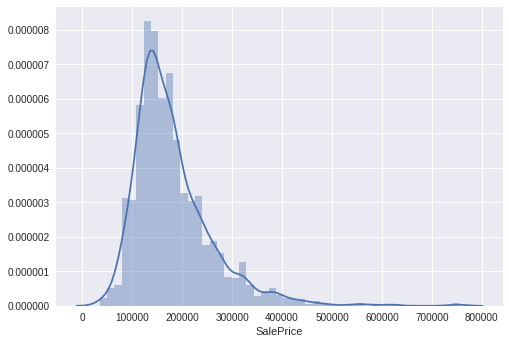

In [0]:
#see the distribution of salesprice with distribution plot
sns.distplot(train_df['SalePrice'])

## Data is right tailed, we can apply log to make it into center


In [0]:
# Import numpy to do transfer the dataset with log
import numpy as np
Y_train=np.log1p(train_df['SalePrice'])

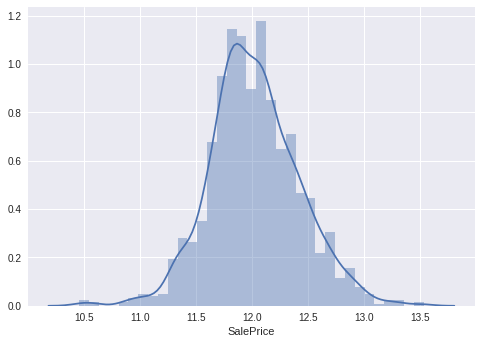

In [0]:
#Now let's see the graph again
sns.distplot(Y_train)

Now we can see that the SalePrice is more center

# Traing data with Machine Learning Model

##Now we can do Modeling trainning with regression
##First method: Ridge Regression

Ridge Regression is a regression model that uses L1 regularization technique. It adds squared magnitude of coefficient as penalty term to the loss function. It is good when a data contains many variables.

In [0]:
#Assign train data set to X_train, test data set to X_test
X_train=train_df
X_test=test_df


In [0]:
# Check if train data set is assigned successfully to X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [0]:
# Check if test data set is assigned successfully to X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

In the beginning, we know that train data set has one more column than test data set due to SalePrice and we can also see from doing X_train.info() and X_test.info()
We need to drop it SalePrice or we will get an error from ridge regression ( how do I know: got an error when doing ridge regression without dropping SalePrice, so comeback to check that data again and find this out)

In [0]:
# Drop SalePrice from train data
X_train.drop(["SalePrice"], axis = 1, inplace = True) 


In [0]:
#See if both data set have the same column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Now we can see that both data have the exact same column

In [0]:
# load ridge regression method
from sklearn.linear_model import Ridge 
# train and predict
ridge = Ridge(alpha=1, normalize=True) 
ridge.fit(X_train, Y_train) 

# make the prediction
ridge_pred = ridge.predict(X_test)
Y_pred = np.expm1(ridge_pred)


We run this ridge regression just to test if the ridge regression works since we are going to do tuning later with GridSearchCV to find the best parameters

# Tuning for Ridge Regression with GridSearchCV
# And use the best parameter to do Ridge Regression


In [0]:
# load tuning method GridSearchCV
from sklearn.model_selection import GridSearchCV
# choose parameters grid
param_grid = {'alpha': np.arange(1, 100)}
# Instantiate ridge regression
ridge=Ridge()
# Instantiate the GridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=10, scoring="neg_mean_squared_error")

# Fit it to the data
ridge_cv.fit(X_train, Y_train)

# Print the tuned parameters and score
print("Tuned ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))



Tuned ridge Regression Parameters: {'alpha': 6}
Best score is -0.02491206402439919


We have best parameters of alpha= 6 and best scores of -0.0249 (smaller negative values is better since the scoring method is neg_mean_squared_error)

Now we plug alpha back in the ridge regression

In [0]:
# load ridge regression method
from sklearn.linear_model import Ridge 
# train and predict
ridge = Ridge(alpha=6, normalize=True) 
ridge.fit(X_train, Y_train) 

# make the prediction
ridge_pred = ridge.predict(X_test)
Y_pred = np.expm1(ridge_pred)


In [0]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('fn1.csv', index=False)

files.download('fn1.csv')

Kaggle Score: 0.25262

##The prediction wasn't as good as we thought might due to not including object variables. 
##Therefore, we include object variables
# To deal with object variables, we do Feature Engineering: we convert the objective data with dummy variables

### ***Important note: please restart or refresh the execution (⌘/Ctrl+M .) before execute the following codes since I used different notation for dummy variables. Also, if execute the codes without restarting, either the data will be a mess or there will appears an error ***




In [0]:
# load the necessary libraries

# pandas
import pandas as pd
from pandas import Series,DataFrame

# visualization
import seaborn as sns

# to download files from Colab to our computer
from google.colab import files

In [0]:
# get train & test csv files as a DataFrame
train_df = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/train.csv")
test_df = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/test.csv")

In [0]:
#Drop variables that has a lot of values missing in train dataset
train_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1, inplace = True) 


In [0]:
#Drop variables that has a lot of values missing in testing dataset
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1, inplace = True)

In [0]:
#It seems easier to do dummy variables when we convert train and test data set into one data set 
#convert train and test data set into one
One_df=pd.concat((train_df, test_df), axis=0)

In [0]:
#See what the shape of data looks like
One_df.shape

(2919, 76)

In [0]:
#We can convert the object data type into numerical type by using get dummies
One_df_dummy=pd.get_dummies(One_df)

In [0]:
#See if the data is convert successful
One_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 272 entries, 1stFlrSF to Utilities_NoSeWa
dtypes: float64(12), int64(26), uint8(234)
memory usage: 1.5 MB


# Go back to the process of add mean like before


In [0]:
#fill in missing values with mean in data set
One_mean = One_df_dummy.mean()



In [0]:
One_df_dummy_mean=One_df_dummy.fillna(One_mean)


In [0]:
# See whether there is still missing value
One_df_dummy_mean.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
Id                       0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
LowQualFinSF             0
MSSubClass               0
MasVnrArea               0
MiscVal                  0
MoSold                   0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
                        ..
RoofMatl_Metal           0
RoofMatl_Roll            0
RoofMatl_Tar&Grv         0
RoofMatl_WdShake         0
RoofMatl_WdShngl         0
RoofStyle_Flat           0
R

We see all missing value is filled up with mean

# We do the same things like before (do log to SalePrice)

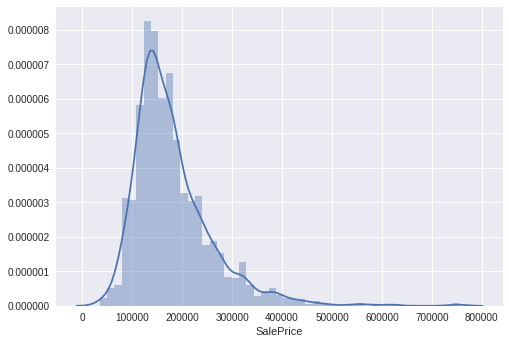

In [0]:
#see the distribution of salesprice with distribution plot
sns.distplot(train_df['SalePrice'])

In [0]:
# Import numpy to do transfer the dataset into log 
import numpy as np
Y_train=np.log1p(train_df['SalePrice'])

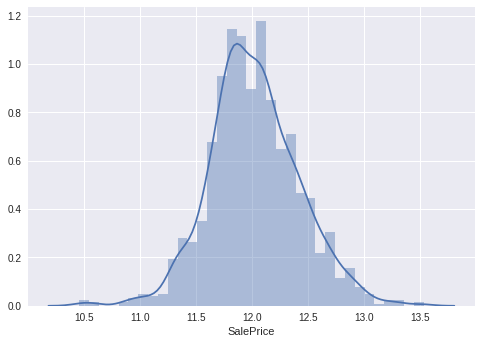

In [0]:
#Now let's see the graph again
sns.distplot(Y_train)

# Convert one_df_dummy_mean data back to train data and test data 
# Then assign it to X_train and X_test

In [0]:
train_df_dummy=One_df_dummy_mean[:train_df.shape[0]]
test_df_dummy=One_df_dummy_mean[train_df.shape[0]:]

In [0]:
# See the shape of the data
train_df_dummy.shape

(1460, 272)

In [0]:
# See the shape of the data
test_df_dummy.shape

(1459, 272)

In [0]:
# Assign train_df_dummy to X_train
X_train=train_df_dummy

In [0]:
# Assign test_df_dummy to X_test
X_test=test_df_dummy

# Machine Learning Model again
## Ridge Regression 

In [0]:
# load ridge regression method
from sklearn.linear_model import Ridge 
# train and predict
ridge = Ridge(alpha=1, normalize=True) 
ridge.fit(X_train, Y_train) 

# make the prediction
ridge_pred = ridge.predict(X_test)
Y_pred = np.expm1(ridge_pred)


In [0]:
# load tuning method GridSearchCV
from sklearn.model_selection import GridSearchCV
# choose parameters grid
param_grid = {'alpha': np.arange(1, 100)}
# Instantiate ridge regression
ridge=Ridge()
# Instantiate the GridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=10, scoring="neg_mean_squared_error")

# Fit it to the data
ridge_cv.fit(X_train, Y_train)

# Print the tuned parameters and score
print("Tuned ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned ridge Regression Parameters: {'alpha': 5}
Best score is -0.006970512870046685


Now we have our best parameter which alpha=5, and best score of -0.00697

We then plug it back to our ridge regression



In [0]:
# load ridge regression method
from sklearn.linear_model import Ridge 
# train and predict
ridge = Ridge(alpha=5, normalize=True) 
ridge.fit(X_train, Y_train) 

# make the prediction
ridge_pred = ridge.predict(X_test)
Y_pred = np.expm1(ridge_pred)


In [0]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('fn2.csv', index=False)

files.download('fn2.csv')

Kaggle score: 0.19523

## Let's try different regression model 
## Second Method: Lasso Regression

Lasso Regression uses L1 regulation techniques.It adds absolute value of magnitude of coefficient as penalty term to the loss function. Lasso works well for feature selection in case we have a huge number of features since Lasso shrinks less important feature's coefficient to zero which removes some feature altogether. 

In [0]:
# load Lasso regression method
from sklearn.linear_model import Lasso 
# train and predict
lasso = Lasso(alpha=0.1, normalize=False) 
lasso.fit(X_train, Y_train)

#make the prediction
lasso_pred = lasso.predict(X_test)
Y_pred = np.expm1(lasso_pred)



The lasso regression above is just testing whether the lasso regression works

## Tuning for Lasso Regression with GridSearchCV


In [0]:
# load tuning method GridSearchCV
from sklearn.model_selection import GridSearchCV
# choose parameters grid
param_grid = {'alpha': np.arange(1, 100)}
# Instantiate ridge regression
lasso=Lasso()
# Instantiate the GridSearchCV object: ridge_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring="neg_mean_squared_error")

# Fit it to the data
lasso_cv.fit(X_train, Y_train)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': 1}
Best score is -0.01498752467336129


We have best parameters which alpha=1, and best score of -0.0149875

We then plug the alpha back into lasso regression

In [0]:
# load Lasso regression method
from sklearn.linear_model import Lasso 
# train and predict
lasso = Lasso(alpha=1, normalize=False) 
lasso.fit(X_train, Y_train)

#make the prediction
lasso_pred = lasso.predict(X_test)
Y_pred = np.expm1(lasso_pred)

In [0]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('fn3.csv', index=False)

files.download('fn3.csv')

Kaggle Score: 0.38465

## Let's try different method
## Third Method: Decision Tree

Decision tree is the most powerful and popular tool for classification and prediction. It is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label. In this project, trees (regression trees) predict continuous values like price of a house in our project.

In [0]:
# load decision tree method
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor (random_state = 1)
# random_state is the seed for the random number generator. 
# If we all have 1, then we all have the same results
# Important for replicability of the results

# train and predict 
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

Again, the Decision Tree above is for testing whether it is able to run our data sucessfully,

We will use tune to find the best parameters and do the Decision Tree method and prediction in tne same time

## Tuning for Decision Tree with GridSearchCV
## Also fit the Decision Tree method and predict


In [0]:
# load decision tree method
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor (random_state = 1)
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define your grid of hyperparameters
params_dt = {
'max_depth': [3, 4, 5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

# Start a 10-fold CV grid search 
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,
scoring='neg_mean_squared_error',
cv=10,
n_jobs=-1)


#Fit grid_dt to the training data
grid_dt.fit(X_train, Y_train)


# predict with the best estimators
Yy_pred = grid_dt.best_estimator_.predict(X_test)
Y_pred = np.expm1(Yy_pred)


In [0]:
# we can check the best hyperparameter values and fine-tune even more if necessary
grid_dt.best_params_

{'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}

In [0]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('fn4.csv', index=False)

files.download('fn4.csv')

Kaggle Score: 0.43094

## Fourth Method: Random Forest
We use random forest because it reduce variance through bagging algorithm. Usually, it is highly desirable for the model to be stable. This is because Decision Tree is really sensitive if our data is a little different. However, Random Forest can solve this issue.

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

dt.score(X_train, Y_train, sample_weight=None)

0.9999999018376117

In [0]:
Again, the Random Forest above is for testing whether it is able to run our data sucessfully,

We will use tune to find the best parameters and do the Random Forest method and prediction in tne same time

## Tuning for Random Forest with GridSearchCV
## Also fit the Random Forest method and predict

In [0]:
# check out random forest hyperparameters
print(rf.get_params())

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define your grid of hyperparameters
params_rf = {
'n_estimators': [1,3, 5, 10],
'max_depth': [2, 3, 4, 5, 20, 32],
'min_samples_leaf': [1, 5, 8 , 3],
'max_features': ['log2', 'sqrt']
}

# start a 10-fold CV grid search
grid_rf = GridSearchCV(estimator=rf,
param_grid=params_rf,
scoring='neg_mean_squared_error',
cv=10,
n_jobs=-1)

# fit 'grid_dt' to the training data
# training our model may take a while!
grid_rf.fit(X_train, Y_train)
Yy_pred = grid_rf.best_estimator_.predict(X_test)
Y_pred = np.expm1(Yy_pred)


In [0]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('fn5.csv', index=False)

files.download('fn5.csv')

Kaggle Score: 0.21247

## Fifth Method: XGboost

XGBoost is a library designed and optimized for boosted tree algorithms. It's main goal is to push the extreme of the computation limits of machines to provide a scalable, portable and accurate for large scale tree boosting.

## Tuning for XGboost with GridSearchCV
## Also fit the XGboost method and predict

In [0]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgbr_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9], 'n_estimators': [200], 'subsample': [0.3, 0.5, 0.9]}
xgbr = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=xgbr, param_grid=xgbr_param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1)
grid_mse.fit(X_train, Y_train)

Yy_pred = grid_mse.best_estimator_.predict(X_test)
Y_pred = np.expm1(Yy_pred)


print("Best parameters found: ",grid_mse.best_params_)  

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.2min finished


Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}


In [0]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('fn6.csv', index=False)

files.download('fn6.csv')

Kaggle Score: 0.42653